In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(12345)

In [2]:
def signal(t, freq_1=4.0, freq_2=7.0):
    return np.sin(freq_1*2*np.pi*t) + np.sin(freq_2*2*np.pi*t)

In [3]:
sample_size = 2**7
sample_t = np.linspace(0, 4, sample_size, dtype=np.float64)
sample_y = signal(sample_t) + rng.standard_normal(sample_size)
sample_d = 4. / (sample_size - 1) # Spacing for linspace array
true_signal = signal(sample_t)

In [4]:
from numpy import fft

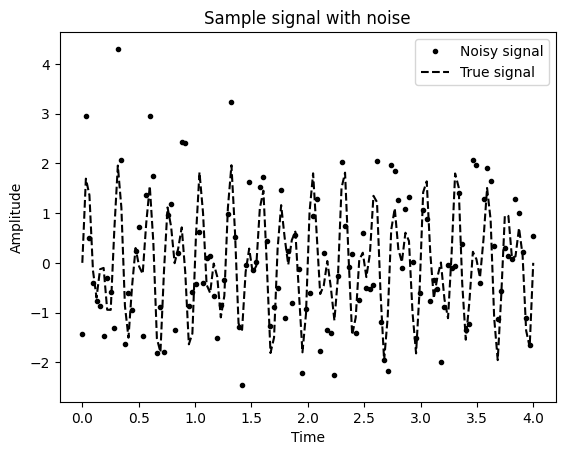

In [5]:
fig1, ax1 = plt.subplots()
ax1.plot(sample_t, sample_y, "k.", label="Noisy signal")
ax1.plot(sample_t, true_signal, "k--", label="True signal")
ax1.set_title("Sample signal with noise")
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")
ax1.legend()

In [6]:
spectrum = fft.fft(sample_y)
spectrum

array([  3.01288987+0.00000000e+00j,  12.09909394-2.25386863e+00j,
        -7.70299688+5.38475135e+00j,   1.59354511+1.77740313e+00j,
       -14.01113097+1.24827429e+01j,  -6.43714034+4.30296377e-01j,
        -4.9347667 -1.48732265e+01j,   7.56050372+2.16126866e+00j,
         5.0284832 +1.26539891e+01j,   1.81173889-1.77366467e+00j,
         8.45838281-1.02357029e+00j, -12.41308041+5.80322223e+00j,
         3.05042816+1.02848547e+01j,  11.4210086 -2.01697266e+00j,
         5.39576268-1.46664555e+01j,   0.54337409-1.42841147e+01j,
         9.35687949-5.46705555e+01j,  -6.98680645+1.11325464e+01j,
        -3.00379717-1.10138055e+00j,   4.4824642 -1.00575251e+01j,
       -10.33686537-3.40228326e+00j,  10.37156415+6.03181091e+00j,
        10.43954123-6.35236038e+00j,  -0.38032168+2.14907749e-02j,
        -8.60872706+8.44968074e+00j,  11.62708292-1.22155079e+00j,
         6.12936448+1.32942189e+00j,   4.52489083-7.11086681e+00j,
        22.5864416 -5.14284055e+01j, -14.84420986+7.30701429e+

In [7]:
freq = fft.fftfreq(sample_size, sample_d)
freq

array([  0.        ,   0.24804688,   0.49609375,   0.74414062,
         0.9921875 ,   1.24023438,   1.48828125,   1.73632812,
         1.984375  ,   2.23242188,   2.48046875,   2.72851562,
         2.9765625 ,   3.22460938,   3.47265625,   3.72070312,
         3.96875   ,   4.21679688,   4.46484375,   4.71289062,
         4.9609375 ,   5.20898438,   5.45703125,   5.70507812,
         5.953125  ,   6.20117188,   6.44921875,   6.69726562,
         6.9453125 ,   7.19335938,   7.44140625,   7.68945312,
         7.9375    ,   8.18554688,   8.43359375,   8.68164062,
         8.9296875 ,   9.17773438,   9.42578125,   9.67382812,
         9.921875  ,  10.16992188,  10.41796875,  10.66601562,
        10.9140625 ,  11.16210938,  11.41015625,  11.65820312,
        11.90625   ,  12.15429688,  12.40234375,  12.65039062,
        12.8984375 ,  13.14648438,  13.39453125,  13.64257812,
        13.890625  ,  14.13867188,  14.38671875,  14.63476562,
        14.8828125 ,  15.13085938,  15.37890625,  15.62

In [8]:
pos_freq_i = np.arange(1, sample_size//2, dtype=int)
pos_freq_i

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [9]:
psd = np.abs(spectrum[pos_freq_i])**2 + np.abs(spectrum[-pos_freq_i])**2

Text(0, 0.5, 'Density')

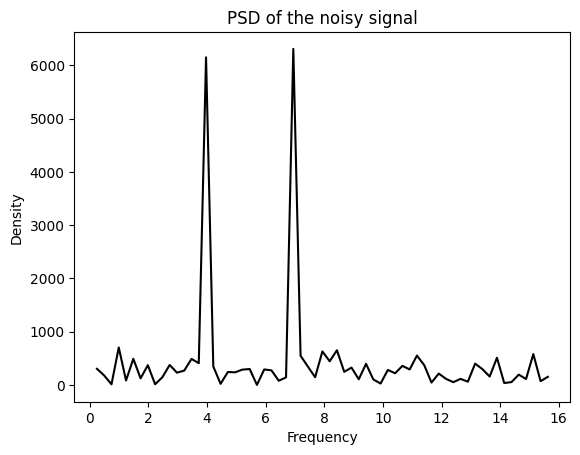

In [10]:
fig2, ax2 = plt.subplots()
ax2.plot(freq[pos_freq_i], psd, "k")
ax2.set_title("PSD of the noisy signal")
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Density")

In [11]:
filtered = pos_freq_i[psd > 2e3]
filtered

array([16, 28])

In [12]:
new_spec = np.zeros_like(spectrum)
new_spec[filtered] = spectrum[filtered]
new_spec[-filtered] = spectrum[-filtered]
new_sample = np.real(fft.ifft(new_spec))
new_sample

array([ 0.49911439,  1.56438832,  0.83569067, -0.36356099, -0.46486293,
        0.03246559, -0.24688064, -1.00355064, -0.65736759,  0.89677342,
        1.73168225,  0.65365248, -0.9639575 , -1.17948492, -0.22066571,
        0.21862843, -0.20671191, -0.14956853,  0.87276418,  1.36486123,
        0.17246045, -1.44728538, -1.46157421,  0.00225041,  0.94977008,
        0.51804638, -0.02322739,  0.34764775,  0.67155501, -0.23533487,
       -1.48778915, -1.21992866,  0.49911439,  1.56438832,  0.83569067,
       -0.36356099, -0.46486293,  0.03246559, -0.24688064, -1.00355064,
       -0.65736759,  0.89677342,  1.73168225,  0.65365248, -0.9639575 ,
       -1.17948492, -0.22066571,  0.21862843, -0.20671191, -0.14956853,
        0.87276418,  1.36486123,  0.17246045, -1.44728538, -1.46157421,
        0.00225041,  0.94977008,  0.51804638, -0.02322739,  0.34764775,
        0.67155501, -0.23533487, -1.48778915, -1.21992866,  0.49911439,
        1.56438832,  0.83569067, -0.36356099, -0.46486293,  0.03

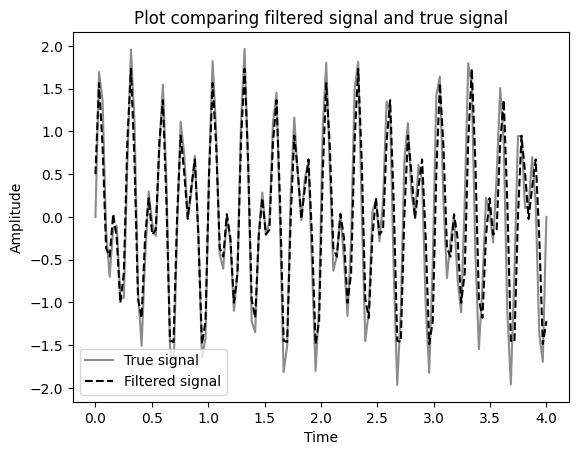

In [13]:
fig3, ax3 = plt.subplots()
ax3.plot(sample_t, true_signal, color="#8c8c8c", linewidth=1.5, label="True signal")
ax3.plot(sample_t, new_sample, "k--", label="Filtered signal")
ax3.legend()
ax3.set_title("Plot comparing filtered signal and true signal")
ax3.set_xlabel("Time")
ax3.set_ylabel("Amplitude")
plt.show()
